# Tarea 5

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
'''from google.colab import files
uploaded=files.upload()'''

'from google.colab import files\nuploaded=files.upload()'

Cargamos la base de datos preprocesada

In [4]:
df= pd.read_csv("BaseDatos_Mod.csv")   #he cambiado el nombre del csv, tengo que cambiarlo de vuelta (GEMA)
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot',
       'TP', 'ALB', 'AG', 'Class'],
      dtype='object')

In [0]:
x = df[['Age', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot', 'TP','ALB','AG']].values
variables_aux=df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt','Sgot', 'TP','ALB','AG']]

y = df[['Class']].values

In [0]:
bi_y=[]
for valor in df[['Class']].values:
    if valor==1:
        bi_y.append(0)
    else:
        bi_y.append(1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, bi_y, test_size=0.3, random_state = 1)

Balancear datos

In [7]:
from imblearn.under_sampling import NearMiss

desbal = NearMiss(ratio=1, n_neighbors=3, version=2, random_state=2)

X_train_res, y_train_res = desbal.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
X_train,y_train= X_train_res, y_train_res

Normalizamos

In [0]:
escalar=StandardScaler()
X_train_normalizado= escalar.fit_transform(X_train)
X_test_normalizado= escalar.transform(X_test)

Funciones 

In [0]:
def resultados(matriz_cnf):
    sens= matriz_cnf[1,1]/(matriz_cnf[1,1]+matriz_cnf[1,0])
    esp=matriz_cnf[0,0]/(matriz_cnf[0,0]+matriz_cnf[0,1])
    falsoneg=matriz_cnf[1,0]
    return [sens,esp,falsoneg]

# 3. Modelo basado en un Perceptrón Multicapa sobre el espacio original

- El número de neuronas de entrada al MLP: *igual al numero de caracteristicas*
- El número de neuronas de salida del MLP: * 2 ya que mi variable salida clasifica en enfermo en sano*
- Las funciones de activación consideradas:*ReLU y sigmoide*
- El valor de la tasa de aprendizaje utilizada, así como variación (o no) de la misma durante el aprendizaje: *He utilizado una tasa de aprendizaje de 0.01, con un decay de 0.01*
- Función de coste a optimizar: *binary_crossentropy, ya que es un problema de clasificación binaria*
- Número máximo de épocas. Explique de manera breve y concisa qué es una época, ejemplificando con su caso particular: *Una época se define como, cada iteración de la red por el lote de entradas en la que haya ajuste de variables. En mi caso he elegido máximo 150 épocas, ya que he observado que a partir de esta cantidad de iteraciones mi modelo caía en sobreajuste siempre*
- Los valores numéricos que representan el número de neuronas consideradas en la capa oculta. Justifique la consideración de cada uno de los valores indicados (al menos, tres valores: n_hidden_1, n_hidden_2 y n_hidden_3):
- Porcentaje de observaciones consideradas al aplicar la técnica “early stopping”:*patiencie de 50 para tener en cuenta 50 iteraciones, sobre el subconjunto de validación que es de 30%*
- Tamaño del mini-batch: *32 porque valores muy grandes de mini-batch tienden a degradar la calidad del modelo, es decir, estos modelos tienden a converger en afilados mínimos en el entrenamiento lo que lleva a una mala generalización. A su vez valores muy pequeños de mini-batch, llevan a modelos que convergen en mínimos más aplanados, esto ocurre por el ruido interno en el gradiente de estimación*
- Si hace uso o no (y por qué) de aleatorización de las observaciones durante el aprendizaje: *He aleatorizado los pesos iniciales de mi red neuronal, ya que para obtener buenas prestaciones tenemos que romper las posibles simetrías. De esta manera el aprendizaje es más rápido y converge antes.*

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

Using TensorFlow backend.


Definimos la red neuronal (3 neuronas en la capa oculta)

In [12]:
# backpropagation + mini batch + early stopping
model3 = Sequential()
model3.add(Dense(3, input_dim=9, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, momentum=0.9, decay=0.01, nesterov=False)
model3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [14]:
#mini batches
# fit model
history = model3.fit(X_train_normalizado, y_train, validation_split=0.3, epochs=150, verbose=1, batch_size=10, callbacks=[es])




Train on 163 samples, validate on 71 samples
Epoch 1/150





163/163 [==============================] - 1s 3ms/step - loss: 0.7562 - acc: 0.5583 - val_loss: 0.6571 - val_acc: 0.4930
Epoch 2/150
163/163 [==============================] - 0s 224us/step - loss: 0.5521 - acc: 0.7853 - val_loss: 0.7737 - val_acc: 0.4225
Epoch 3/150
163/163 [==============================] - 0s 167us/step - loss: 0.4993 - acc: 0.7975 - val_loss: 0.7726 - val_acc: 0.4789
Epoch 4/150
163/163 [==============================] - 0s 160us/step - loss: 0.4679 - acc: 0.8221 - val_loss: 0.7421 - val_acc: 0.5493
Epoch 5/150
163/163 [==============================] - 0s 190us/step - loss: 0.4431 - acc: 0.8221 - val_loss: 0.7513 - val_acc: 0.5352
Epoch 6/150
163/163 [==============================] - 0s 163us/step - loss: 0.4247 - acc: 0.8528 - val_loss: 0.7063 - val_acc: 0.5915
Epoch 7/150
163/163 [==============================] - 0s 163us/step - loss: 0.4071 - acc: 0.8589 - val_loss: 0.6980 - val_acc: 0.6056
Epoc

In [15]:
# evaluate the model
_, train_acc = model3.evaluate(X_train_normalizado, y_train, verbose=1, batch_size=10)
_, test_acc = model3.evaluate(X_test_normalizado, y_test, verbose=1, batch_size=10)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
acc3=train_acc
acc=test_acc

175/175 [==============================] - 0s 67us/step
Train: 0.876, Test: 0.657


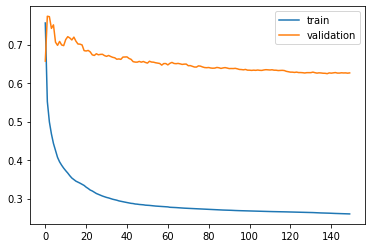

In [16]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

Resultados

In [17]:
y_pred = model3.predict(X_test_normalizado)
y_pred = (y_pred > 0.5)
y_pred_val = model3.predict(X_train_normalizado)
y_pred_val = (y_pred_val > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_val = confusion_matrix(y_train, y_pred_val)
print(cm)
res=resultados(cm)
res_val=resultados(cm_val)
print("La sensibilidad es: ",res[0]," la especificidad es: ",res[1]," y los falsos negativos son: ", res[2])
sen3=res_val[0]
fn3=res_val[2]
sen=res[0]
fn=res[2]

[[78 47]
 [13 37]]
La sensibilidad es:  0.74  la especificidad es:  0.624  y los falsos negativos son:  13


Para 2 neuronas en la capa oculta

In [18]:
# backpropagation + mini batch + early stopping
model2 = Sequential()
model2.add(Dense(2, input_dim=9, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, momentum=0.9, decay=0.01, nesterov=False)
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#mini batches
# fit model
history = model2.fit(X_train_normalizado, y_train, validation_split=0.3, epochs=150, verbose=1, batch_size=10, callbacks=[es])
# evaluate the model
_, train_acc = model2.evaluate(X_train_normalizado, y_train, verbose=1, batch_size=10)
_, test_acc = model2.evaluate(X_test_normalizado, y_test, verbose=1, batch_size=10)

Train on 163 samples, validate on 71 samples
Epoch 1/150
163/163 [==============================] - 0s 1ms/step - loss: 0.5778 - acc: 0.7178 - val_loss: 1.1606 - val_acc: 0.0000e+00
Epoch 2/150
163/163 [==============================] - 0s 174us/step - loss: 0.5493 - acc: 0.7178 - val_loss: 1.1833 - val_acc: 0.0000e+00
Epoch 3/150
163/163 [==============================] - 0s 202us/step - loss: 0.5244 - acc: 0.7178 - val_loss: 1.2189 - val_acc: 0.0000e+00
Epoch 4/150
163/163 [==============================] - 0s 156us/step - loss: 0.5043 - acc: 0.7178 - val_loss: 1.2562 - val_acc: 0.0000e+00
Epoch 5/150
163/163 [==============================] - 0s 154us/step - loss: 0.4872 - acc: 0.7178 - val_loss: 1.2882 - val_acc: 0.0000e+00
Epoch 6/150
163/163 [==============================] - 0s 167us/step - loss: 0.4751 - acc: 0.7178 - val_loss: 1.2961 - val_acc: 0.0000e+00
Epoch 7/150
163/163 [==============================] - 0s 163us/step - loss: 0.4613 - acc: 0.7178 - val_loss: 1.2898 - val_

Train: 0.821, Test: 0.669


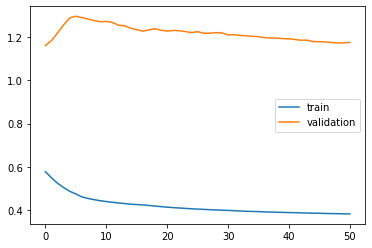

In [19]:
# plot training history
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
acc2=train_acc
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

Resultados

In [20]:
y_pred = model2.predict(X_test_normalizado)
y_pred = (y_pred > 0.5)
y_pred_val = model2.predict(X_train_normalizado)
y_pred_val = (y_pred_val > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_val = confusion_matrix(y_train, y_pred_val)
print(cm)

res=resultados(cm)
res_val=resultados(cm_val)
print("La sensibilidad es: ",res[0]," la especificidad es: ",res[1]," y los falsos negativos son: ", res[2])
sen2=res_val[0]
fn2=res_val[2]

[[85 40]
 [18 32]]
La sensibilidad es:  0.64  la especificidad es:  0.68  y los falsos negativos son:  18


Para 1 neurona en la capa oculta

In [21]:
# backpropagation + mini batch + early stopping
model1 = Sequential()
model1.add(Dense(2, input_dim=9, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, momentum=0.9, decay=0.01, nesterov=False)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#mini batches
# fit model
history = model1.fit(X_train_normalizado, y_train, validation_split=0.3, epochs=150, verbose=1, batch_size=10, callbacks=[es])
# evaluate the model
_, train_acc = model1.evaluate(X_train_normalizado, y_train, verbose=1, batch_size=10)
_, test_acc = model1.evaluate(X_test_normalizado, y_test, verbose=1, batch_size=10)

Train on 163 samples, validate on 71 samples
Epoch 1/150
163/163 [==============================] - 0s 2ms/step - loss: 0.5511 - acc: 0.6687 - val_loss: 0.7823 - val_acc: 0.4930
Epoch 2/150
163/163 [==============================] - 0s 203us/step - loss: 0.5451 - acc: 0.6748 - val_loss: 0.7944 - val_acc: 0.4648
Epoch 3/150
163/163 [==============================] - 0s 170us/step - loss: 0.5408 - acc: 0.6933 - val_loss: 0.8064 - val_acc: 0.4507
Epoch 4/150
163/163 [==============================] - 0s 155us/step - loss: 0.5362 - acc: 0.6871 - val_loss: 0.8159 - val_acc: 0.4366
Epoch 5/150
163/163 [==============================] - 0s 153us/step - loss: 0.5322 - acc: 0.6994 - val_loss: 0.8258 - val_acc: 0.4085
Epoch 6/150
163/163 [==============================] - 0s 173us/step - loss: 0.5283 - acc: 0.6994 - val_loss: 0.8353 - val_acc: 0.4085
Epoch 7/150
163/163 [==============================] - 0s 156us/step - loss: 0.5247 - acc: 0.7117 - val_loss: 0.8448 - val_acc: 0.4085
Epoch 8/150


Train: 0.697, Test: 0.743


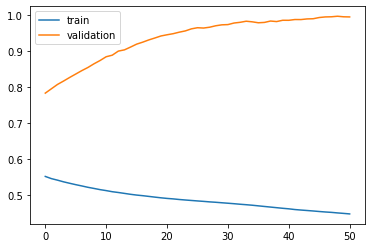

In [22]:
# plot training history
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
acc1=train_acc
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

Resultados

In [23]:
y_pred = model1.predict(X_test_normalizado)
y_pred_val = model1.predict(X_train_normalizado)
y_pred = (y_pred > 0.5)
y_pred_val = (y_pred_val > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_val = confusion_matrix(y_train, y_pred_val)
print(cm)
res=resultados(cm)
res_val=resultados(cm_val)
print("La sensibilidad es: ",res[0]," la especificidad es: ",res[1]," y los falsos negativos son: ", res[2])
sen1=res_val[0]
fn1=res_val[2]

[[106  19]
 [ 26  24]]
La sensibilidad es:  0.48  la especificidad es:  0.848  y los falsos negativos son:  26


## PERCEPTRÓN MONOCAPA

In [24]:
from keras.utils import np_utils
# backpropagation + mini batch + early stopping
model = Sequential()
model.add(Dense(output_dim=9, init='uniform', activation='relu', input_dim=9))
# Adding the output layer
model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#mini batches
# fit model
history = model.fit(X_train_normalizado, y_train, validation_data=(X_test_normalizado, y_test), epochs=150, verbose=1, batch_size=10, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(X_train_normalizado, y_train, verbose=1, batch_size=10)
_, test_acc = model.evaluate(X_test_normalizado, y_test, verbose=1, batch_size=10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=9, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Train on 234 samples, validate on 175 samples
Epoch 1/150
234/234 [==============================] - 0s 1ms/step - loss: 0.6907 - acc: 0.7393 - val_loss: 0.6907 - val_acc: 0.6514
Epoch 2/150
234/234 [==============================] - 0s 166us/step - loss: 0.6842 - acc: 0.7821 - val_loss: 0.6856 - val_acc: 0.6514
Epoch 3/150
234/234 [==============================] - 0s 175us/step - loss: 0.6718 - acc: 0.7949 - val_loss: 0.6756 - val_acc: 0.6457
Epoch 4/150
234/234 [==============================] - 0s 174us/step - loss: 0.6516 - acc: 0.7949 - val_loss: 0.6614 - val_acc: 0.6400
Epoch 5/150
234/234 [==============================] - 0s 185us/step - loss: 0.6247 - acc: 0.7949 - val_loss: 0.6470 - val_acc: 0.6457
Epoch 6/150
234/234 [==============================] - 0s 191us/step - loss: 0.5947 - acc: 0.7906 - val_loss: 0.6348 - val_acc: 0.6400
Epoch 7/150
234/234 [==============================] - 0s 192us/step - loss: 0.5644 - acc: 0.7949 - val_loss: 0.6296 - val_acc: 0.6400
Epoch 8/150

Train: 0.868, Test: 0.640


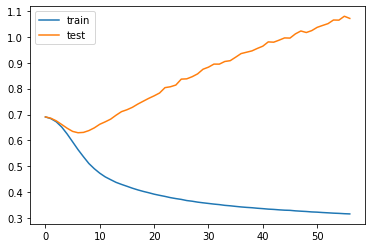

In [25]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Resultados

In [26]:
y_pred = model.predict(X_test_normalizado)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
resultados(cm)
print(cm)

[[73 52]
 [11 39]]


RED BASE RADIAL (3 neuronas capa oculta)

In [0]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu<
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [0]:
model_rbf = Sequential()
model_rbf.add(Dense(3, input_shape=(9,)))
model_rbf.add(RBFLayer(1, 0.5))

In [29]:
model_rbf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#mini batches
# fit model
history = model_rbf.fit(X_train_normalizado, y_train, validation_data=(X_test_normalizado, y_test), epochs=150, verbose=1, batch_size=10, callbacks=[es])
# evaluate the model
_, train_acc = model_rbf.evaluate(X_train_normalizado, y_train, verbose=1, batch_size=10)
_, test_acc = model_rbf.evaluate(X_test_normalizado, y_test, verbose=1, batch_size=10)


Train on 234 samples, validate on 175 samples
Epoch 1/150
234/234 [==============================] - 0s 2ms/step - loss: 0.9321 - acc: 0.5256 - val_loss: 0.8350 - val_acc: 0.5600
Epoch 2/150
234/234 [==============================] - 0s 194us/step - loss: 0.9004 - acc: 0.5513 - val_loss: 0.8276 - val_acc: 0.5714
Epoch 3/150
234/234 [==============================] - 0s 176us/step - loss: 0.8736 - acc: 0.5556 - val_loss: 0.8172 - val_acc: 0.5600
Epoch 4/150
234/234 [==============================] - 0s 182us/step - loss: 0.8503 - acc: 0.5641 - val_loss: 0.8119 - val_acc: 0.5371
Epoch 5/150
234/234 [==============================] - 0s 198us/step - loss: 0.8306 - acc: 0.5769 - val_loss: 0.8094 - val_acc: 0.5314
Epoch 6/150
234/234 [==============================] - 0s 199us/step - loss: 0.8157 - acc: 0.5855 - val_loss: 0.8093 - val_acc: 0.5314
Epoch 7/150
234/234 [==============================] - 0s 698us/step - loss: 0.8020 - acc: 0.5940 - val_loss: 0.8084 - val_acc: 0.5257
Epoch 8/150

Train: 0.821, Test: 0.629


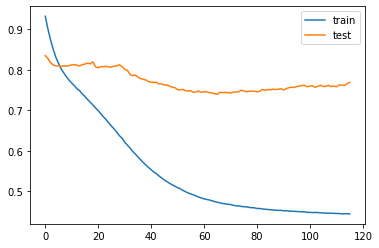

In [30]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Resultados

In [31]:
y_pred = model_rbf.predict(X_test_normalizado)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
resultados(cm)
print(cm)

[[69 56]
 [ 9 41]]


## COMPARAR RESULTADOS

In [0]:
from tabulate import tabulate

In [33]:
#rasultados validación
resultados = [['  ', 'MLP (n_hidden3)','MLP (n_hidden2)','MLP (n_hidden1)'],
         ['Accuracy', acc3, acc2, acc1],
         ['Sensibilidad', sen3, sen2, sen1],
         ['Falsos negativos', fn3, fn2, fn1]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│                  │   MLP (n_hidden3) │   MLP (n_hidden2) │   MLP (n_hidden1) │
╞══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ Accuracy         │          0.876068 │          0.820513 │          0.696581 │
├──────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Sensibilidad     │          0.786325 │          0.683761 │          0.470085 │
├──────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Falsos negativos │         25        │         37        │         62        │
╘══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╛


El que mejor resultados tiene es la red con 3 neuronas en la capa oculta 

In [0]:
#resultados test en MLP con 3 neuronas en la capa oculta

In [35]:
resultados = [['  ', 'MLP (n_hidden3)'],
         ['Accuracy', acc],
         ['Sensibilidad', sen],
         ['Falsos negativos', fn]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤═══════════════════╕
│                  │   MLP (n_hidden3) │
╞══════════════════╪═══════════════════╡
│ Accuracy         │          0.657143 │
├──────────────────┼───────────────────┤
│ Sensibilidad     │          0.74     │
├──────────────────┼───────────────────┤
│ Falsos negativos │         13        │
╘══════════════════╧═══════════════════╛


# 4. Modelo basado en una Máquina de Vectores Soporte sobre el espacio original

In [0]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import heapq

Accuracy Score:
0.6514285714285715
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       125
           1       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175



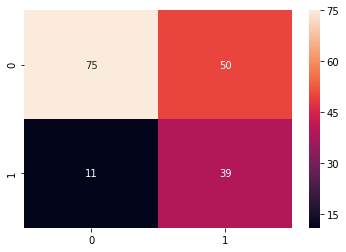

In [37]:
svc=SVC(kernel="rbf", gamma="auto", C=1)
svc.fit(X_train_normalizado,y_train)
y_pred=svc.predict(X_test_normalizado)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))
c_matrix = confusion_matrix(y_test, y_pred)

ax = (sns.heatmap(c_matrix, annot=True))

**Parámetro C**
es 1 por defecto. Si se tiene muchas muestras con ruido, se debe disminuir. Se utiliza para regular la optimización de SVM. Determina el peso del error de clasificación de la función objetivo.

[0.7943181818181818, 0.7943181818181818, 0.7943181818181818, 0.7943181818181818, 0.793939393939394, 0.8227272727272726, 0.8238636363636364, 0.8068181818181819, 0.8068181818181819, 0.8068181818181819, 0.8068181818181819]
[1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 1000, 10000, 100000]


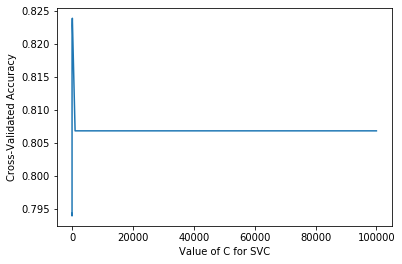

In [38]:
from sklearn.model_selection import cross_val_score
c_values = [10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10, 100,1000,10**3,10**4, 10**5]
accuracy_score=[]

for c in c_values:
    svc = SVC(kernel='rbf',gamma="auto", C=c)
    scores = cross_val_score(svc, X_train_normalizado, y_train, cv=10, scoring='accuracy')
    accuracy_score.append(scores.mean())
print(accuracy_score)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(c_values,accuracy_score)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

print(c_values)

Pruebo con distintos valores de C:
- Muy grandes
- Medianos
- Muy pequeños

Como se obtiene un mayor accuracy con valores medianos, estudio este rango.

[0.8227272727272726, 0.8053030303030304, 0.8102272727272728, 0.8143939393939394, 0.8280303030303031, 0.8193181818181818, 0.8109848484848486, 0.8068181818181819, 0.8068181818181819, 0.8068181818181819]


Text(0, 0.5, 'Cross-Validated Accuracy')

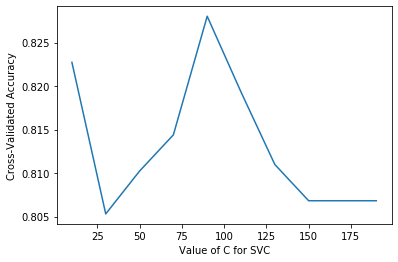

In [39]:
c_values = list(range(10,200, 20))
accuracy_score=[]

for c in c_values:
    svc = SVC(kernel='rbf',gamma="auto", C=c)
    scores = cross_val_score(svc, X_train_normalizado, y_train, cv=10, scoring='accuracy')
    accuracy_score.append(scores.mean())
print(accuracy_score)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(c_values,accuracy_score)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [40]:
index = list(range(len(accuracy_score)))
c_values_max = heapq.nlargest(2, zip(accuracy_score,c_values))
c_values_max

[(0.8280303030303031, 90), (0.8227272727272726, 10)]

Me quedo con los 2 valores máximos de C.

**Párametro sigma**

Un valor de Sigma pequeño provoca que la frontera de decisión tenga en cuenta a las muestras lejanas. 
Un valor de Sigma grande provoca que la frontera de descisión tenga en cuenta a las muestras más cercanas.

[0.7981060606060606, 0.8268939393939394, 0.8272727272727272, 0.7753787878787879, 0.7246212121212121, 0.7121212121212122, 0.6992424242424242]


Text(0, 0.5, 'Cross-Validated Accuracy')

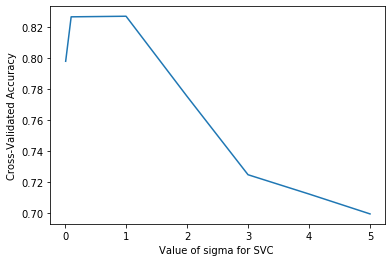

In [41]:
sigma_values = [0.01,0.1,1,2,3,4,5]
accuracy_score=[]
for s in sigma_values:
    svc = SVC(kernel='rbf', gamma=s)
    scores = cross_val_score(svc, X_train_normalizado, y_train, cv=10, scoring='accuracy')
    accuracy_score.append(scores.mean())
print(accuracy_score)    

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(sigma_values,accuracy_score)
plt.xlabel('Value of sigma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
sigma_values_max=heapq.nlargest(3, zip(accuracy_score,sigma_values))
sigma_values_max=[0.1,0.5,1.0]

Utilizo los valores máximos de sigma con los que obtengo mayor accuracy.

**Prestaciones con el mejor modelo**

In [0]:
accuracy_score = []

for c in c_values_max:
  for s in sigma_values_max:
    combination = (c[1],s)
    #print(combination)

    svc=SVC(kernel="rbf", gamma=s, C=c[1])
    svc.fit(X_train_normalizado,y_train)
    y_pred=svc.predict(X_test_normalizado)

    
    acc = metrics.accuracy_score(y_test,y_pred)
    accuracy_score.append([acc, combination])


In [0]:
sigma_kernel_11 = accuracy_score[0][0]
sigma_kernel_12 = accuracy_score[1][0]
sigma_kernel_13 = accuracy_score[2][0]

sigma_kernel_21 = accuracy_score[3][0]
sigma_kernel_22 = accuracy_score[4][0]
sigma_kernel_23 = accuracy_score[5][0]


In [45]:
resultados = [['  ', 'sigma_1','sigma_2','sigma_3'],
         ['C1', sigma_kernel_11, sigma_kernel_12, sigma_kernel_13],
         ['C2', sigma_kernel_21, sigma_kernel_22, sigma_kernel_23]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤═══════════╤═══════════╤═══════════╕
│      │   sigma_1 │   sigma_2 │   sigma_3 │
╞══════╪═══════════╪═══════════╪═══════════╡
│ C1   │  0.634286 │  0.685714 │  0.691429 │
├──────┼───────────┼───────────┼───────────┤
│ C2   │  0.651429 │  0.685714 │  0.691429 │
╘══════╧═══════════╧═══════════╧═══════════╛
